# Altair theme for Reveal data graphics

- You will need 'Tenon' installed as a system-wide font.
- There will likely be more style modifications needed after exporting to SVG.
- There's some bottom padding added to the bottom of each chart to add in Sources and Credits manually.

In [1]:
import pandas as pd
from vega_datasets import data

In [2]:
import altair as alt
import altair_reveal as altair_reveal
alt.themes.register('altair_reveal', altair_reveal.theme)
alt.themes.enable('altair_reveal')

ThemeRegistry.enable('altair_reveal')

Fallback to png for GitHub display:

In [3]:
alt.renderers.enable('mimetype')

RendererRegistry.enable('mimetype')

## Pre-defined colors

In [4]:
altair_reveal.palette

{'black': '#222222',
 'white': '#ffffff',
 'background': '#f9f9f9',
 'light_grey': '#dddddd',
 'dark_grey': '#666666',
 'orange': '#e54600',
 'dark_blue': '#004488',
 'blue': '#0077bb'}

## Horizontal bar chart

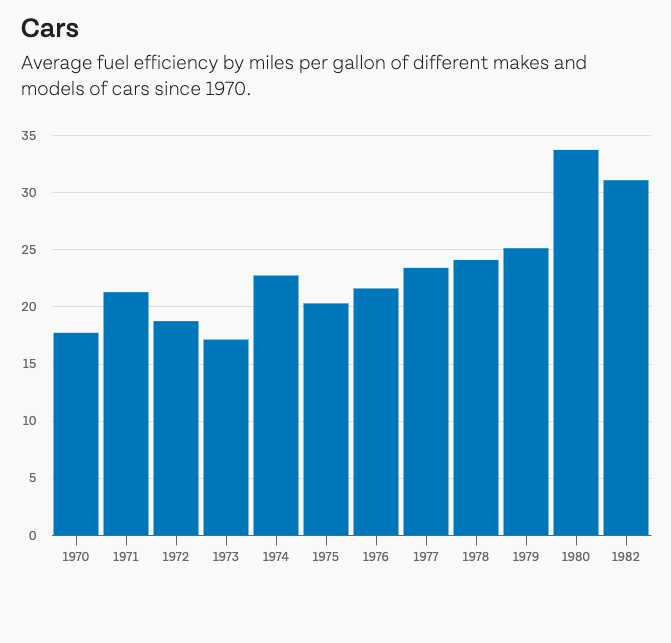

In [5]:
alt.Chart(data.cars()).mark_bar().encode(
    x=alt.X('year(Year):O'), # wrap `Year` column with Altair's year() fn, then type as :O[rdinal] for proper display
    y=alt.Y('mean(Miles_per_Gallon)'),
).properties(
    title={
        'text': 'Cars',
        'subtitle' : ['Average fuel efficiency by miles per gallon of different makes and ', 'models of cars since 1970.', ' ']
    }
)

## Vertical bar chart

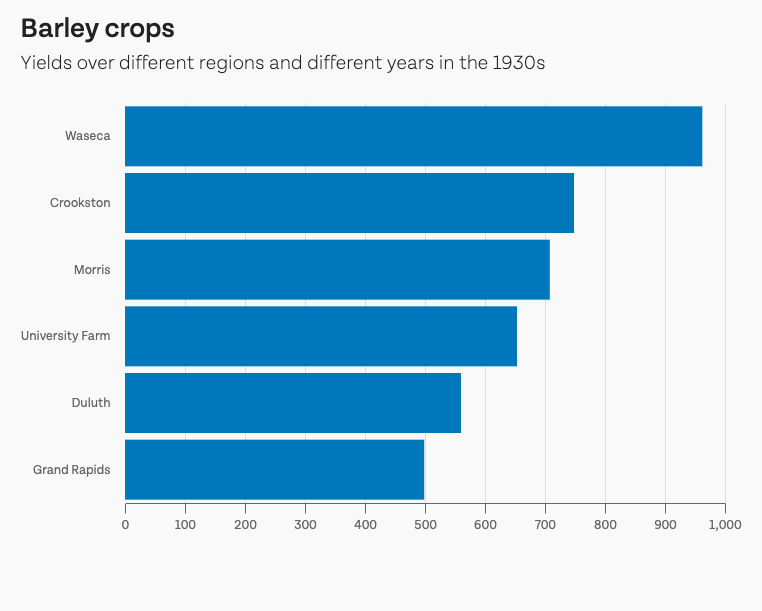

In [6]:
alt.Chart(data.barley()).mark_bar().encode(
    x=alt.X(
        'sum(yield):Q',
        axis=alt.Axis(tickCount=10)
    ),
    y=alt.Y('site:N', sort='-x')
).properties(
    title={
        'text': 'Barley crops',
        'subtitle' : ['Yields over different regions and different years in the 1930s', ' ']
    }
) 

## Line chart

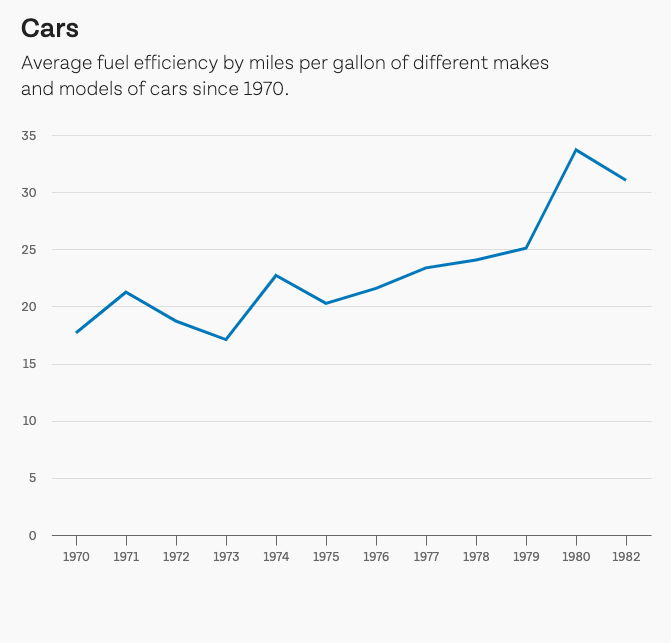

In [7]:
alt.Chart(data.cars()).mark_line().encode(
    x=alt.X('year(Year):O'), # wrap `Year` column with Altair's year() fn, then type as :O[rdinal] for proper display
    y=alt.Y('mean(Miles_per_Gallon)'),
).properties(
    title={
        'text': 'Cars',
        'subtitle' : ['Average fuel efficiency by miles per gallon of different makes', 'and models of cars since 1970.', ' ']
    }
)

## Scatterplot

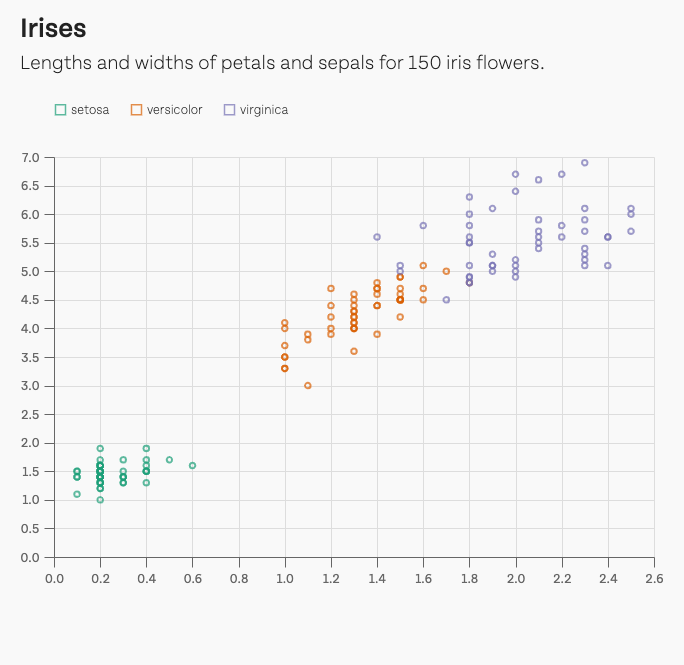

In [8]:
alt.Chart(data.iris()).mark_point().encode(
        x='petalWidth',
        y='petalLength',
        color=alt.Color('species', scale=alt.Scale(scheme='dark2'))
        # color=alt.Color('species', scale=alt.Scale(scheme='dark2'), title='Species') # add a title to the legend if needed
    ).configure_axisY( # adding some colors back to the scatterplot
        domainColor='#666666',
        tickColor='#666666',
    ).properties(
        title={
            'text': 'Irises',
            'subtitle' : ['Lengths and widths of petals and sepals for 150 iris flowers.',' ']
        }
    )

## Step chart

The chart below might need some modifications with the tick marks in production.

In [9]:
data.stocks.description

'Daily closing stock prices for AAPL, AMZN, GOOG, IBM, and MSFT between 2000 and 2010.'

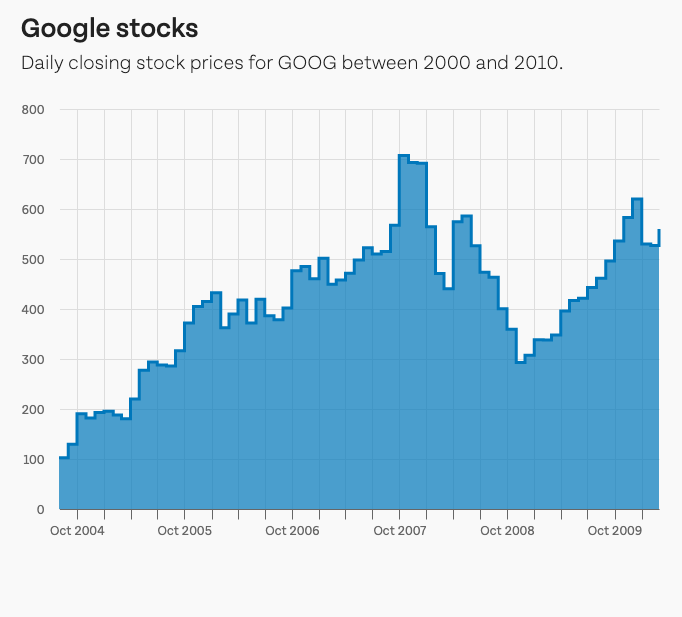

In [10]:
alt.Chart(data.stocks()).mark_area(
        interpolate='step-after',
        line=True
    ).encode(
        x=alt.X('yearmonth(date):T'),
        y='price'
    ).transform_filter(
        alt.datum.symbol == 'GOOG'
    ).properties(
        title={
            'text': 'Google stocks',
            'subtitle' : ['Daily closing stock prices for GOOG between 2000 and 2010.',' ']
        }
    )

## Heatmap

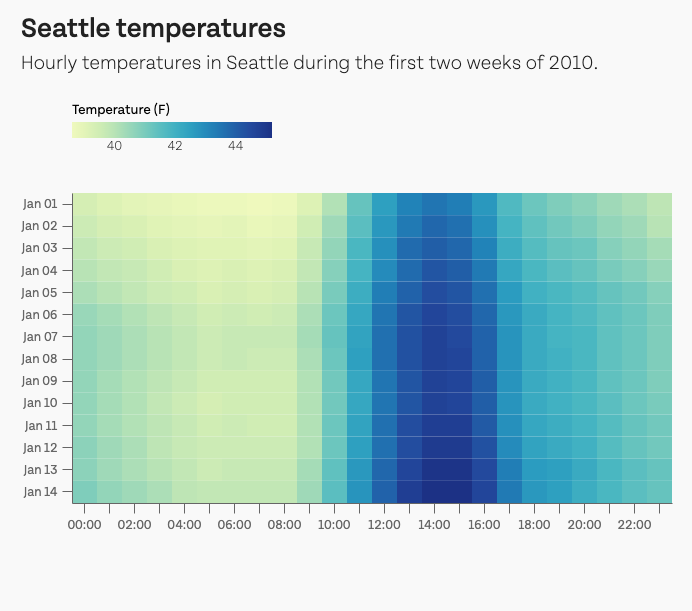

In [11]:
temps = data.seattle_temps()
temps = temps[temps.date < '2010-01-15'].copy()
alt.Chart(temps).mark_rect(
).encode(
    alt.X('hoursminutes(date):O'),
    alt.Y('monthdate(date):O'),
    alt.Color('temp:Q', title='Temperature (F)')
).configure_axisY( # adding some colors back
    domainColor='#666666',
    tickColor='#666666',
).properties(
    height=310, # adjust height to get neat squares
    title={
        'text': 'Seattle temperatures',
        'subtitle' : ['Hourly temperatures in Seattle during the first two weeks of 2010.',' ']
    }
)